# Homework 2 Solutions

In [1]:
%pwd

'/home/cody/Physics 331/331 Homework (Cody)/HW 2 Here to Mars'

In [6]:
%cd "~/Physics 331/Textbook Programs/Chapter 1"
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 1
mars_angle.py


In [8]:
# %load mars_angle.py
#Now I'm going to change it find the distance rather than the angle
import numpy as np
def mars_dist(d):
    """
    Find the distence, in km, from Earth to Mars on a given day 'd' of
    the year 2000

    Input
    ----------
    d: This is the day that I want to evaluate things at

    Output
    ----------
    dist: Distance from Earth to Mars
    """

    Pe = 365.256    #Period of the Earths orbit (days)
    Pm = 686.980    #Period of Mars orbit (days)
    d0 = 187        #Day in the year 2000 that mars crosses theta = 0
    Re = 1.496e8    #Radius of Earths Orbit (km)
    Rm = 2.279e8    #Radius of Mars orbit (km)

    phi_e = 2*np.pi*d/Pe
    phi_m = 2*np.pi*(d-d0)/Pm

    #Find the x and y positions for Earth and Mars
    xe = Re*np.cos( phi_e )
    ye = Re*np.sin( phi_e )
    xm = Rm*np.cos( phi_m )
    ym = Rm*np.sin( phi_m )

    dx = xe - xm
    dy = ye - ym
    dist = np.sqrt(dx**2 + dy**2)

    return dist


Wikipedia says June 27th is the 179th day of the year on leap years. But our days Jan 1st is d = 0, so we want d = 178 for June 27, 2000

In [20]:
mars_dist(178)

377499669.9832511

Using a website the number of days between Jan 1, 2000 and Sept 14, 2015, d = 5735

In [21]:
mars_dist(5735)

349880409.67914045

Now I want to plot the distance over a 20 year span. 

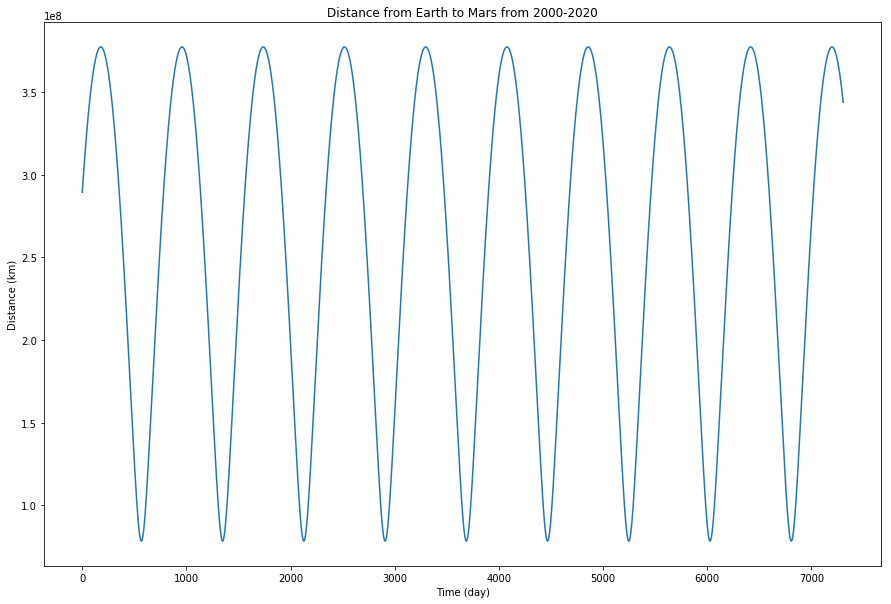

In [37]:
import matplotlib.pyplot as plt
days = np.arange(0,365.256*20, 1)
plt.figure(figsize = (15,10))
plt.plot(days, mars_dist(days))
plt.title('Distance from Earth to Mars from 2000-2020')
plt.xlabel('Time (day)')
plt.ylabel('Distance (km)')
plt.show()

This isn't a perfect sine wave. It looks like the top peeks are wider than the bottom troughs. What's the distance betweent the local minimums? I'm going to use a function in the scipy module called fmin, it finds the local minimum based on an initial guess. We will use this more when we get to chapter 3.

In [40]:
from scipy.optimize import fmin

In [41]:
fmin(mars_dist, 600)

Optimization terminated successfully.
         Current function value: 78300000.000009
         Iterations: 21
         Function evaluations: 42


array([567.63153076])

In [42]:
fmin(mars_dist, 1400)

Optimization terminated successfully.
         Current function value: 78300000.000003
         Iterations: 22
         Function evaluations: 44


array([1347.5658226])

Distance between the minimums are,

In [43]:
1347.5658226 - 567.63153076

779.93429184

In [44]:
#In terms of years this is,
779.934/365

2.136805479452055

This is retrograde motion. Retrograde motion happens when Earth passes Mars in our orbit and happens every 26 months. Lots of people will tell you that when Mars is in retrograde bad things will happen. Do not listen to them because they are idiots. Accurate information about retrograde motion can be found here

https://mars.nasa.gov/allaboutmars/nightsky/retrograde/